In [56]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

Data Set Up
The task here is to develop a unified data set with the following variables with the aim to gauge macroeconomic stability and fiscal solvency:
Variables:
1. Public sector net worth
2. Debt-to-GDP Ratio
3. Ratio of public sector net worth to GDP
4. Inflation
5. Labor market slack
6. Percentage of GDP compared to 2015 Levels

The variables are chosen as part of the traditional tool-kit used in economics to gauge economic performance with the sole exception of public sector net worth and the ratio of public sector net worth to GDP which are novel metrics teh effects of which we are interested in analyzing.




# Data Cleaning

Limpieza de Datos

In [57]:
psnw_over_gdp = pd.read_csv(r'C:\Users\damir\OneDrive\CUNEF Work\Machine Learning\Datasets\EU PSNW over GDP.csv', sep = ',')
debt_to_gdp = pd.read_csv(r'C:\Users\damir\OneDrive\CUNEF Work\Machine Learning\Datasets\Debt-To-GDP Ratio.csv', sep = ',')
psnw = pd.read_csv(r'C:\Users\damir\OneDrive\CUNEF Work\Machine Learning\Datasets\PSNW.csv', sep = ',')
gdp_2015 = pd.read_csv(r'C:\Users\damir\OneDrive\CUNEF Work\Machine Learning\Datasets\GDP Quarterly at 2015.csv', sep =',')
slack = pd.read_csv(r'C:\Users\damir\OneDrive\CUNEF Work\Machine Learning\Datasets\Labor Slack.csv', sep = ',')

C:\Users\damir\AppData\Local\Temp\ipykernel_21988\749859950.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp_2015 = pd.read_csv(r'C:\Users\damir\OneDrive\CUNEF Work\Machine Learning\Datasets\GDP Quarterly at 2015.csv', sep =',')


In [58]:
gdp = gdp_2015[gdp_2015['na_item'] == 'Gross domestic product at market prices'].copy()
gdp = gdp[gdp['s_adj'] == 'Unadjusted data (i.e. neither seasonally adjusted nor calendar adjusted data)'].copy()
gdp = gdp[gdp['unit'] == 'Chain linked volumes, index 2015=100'].copy()
gdp.sort_values(by=['geo', 'TIME_PERIOD'], inplace=True)
gdp['gdp growth rate'] = gdp.groupby(['geo'])['OBS_VALUE'].pct_change() * 100
gdp['gdp growth rate'] = gdp['gdp growth rate'].round(2)
gdp['gdp growth rate'] = gdp['gdp growth rate'].fillna(0)
gdp

C:\Users\damir\AppData\Local\Temp\ipykernel_21988\1339585961.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gdp['gdp growth rate'] = gdp.groupby(['geo'])['OBS_VALUE'].pct_change() * 100


,DATAFLOW,LAST UPDATE,freq,unit,s_adj,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS,gdp growth rate
29795,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,Albania,2018-Q1,100.917,NaN,NaN,0.00
29796,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,Albania,2018-Q2,118.598,NaN,NaN,17.52
29797,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,Albania,2018-Q3,112.646,NaN,NaN,-5.02
29798,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,Albania,2018-Q4,112.881,NaN,NaN,0.21
29799,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,Albania,2019-Q1,103.598,NaN,NaN,-8.22
...,...,...,...,...,...,...,...,...,...,...,...,...
30983,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,United Kingdom,2019-Q3,105.918,NaN,NaN,1.63
30984,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,United Kingdom,2019-Q4,110.282,NaN,NaN,4.12
30985,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,United Kingdom,2020-Q1,101.881,NaN,NaN,-7.62
30986,ESTAT:NAMQ_10_GDP(1.0),10/12/25 23:00:00,Quarterly,"Chain linked volumes, index 2015=100",Unadjusted data (i.e. neither seasonally adjus...,Gross domestic product at market prices,United Kingdom,2020-Q2,81.574,NaN,NaN,-19.93


In [59]:
slack.drop(slack[slack['wstatus'] != 'Labour market slack'].index, inplace=True)

In [60]:
inflation = pd.read_csv(r'C:\Users\damir\OneDrive\CUNEF Work\Machine Learning\Datasets\Inflation Monthly Euro Zone.csv')
inflation['TIME_PERIOD'] = pd.to_datetime(inflation['TIME_PERIOD'])
inflation['Quarter_Period'] = inflation['TIME_PERIOD'].dt.to_period('Q')
def compound_rates(x):
    return (np.prod(1 + x / 100.0) - 1) * 100.0
grouped = inflation.groupby(['geo', 'coicop', 'Quarter_Period'])['OBS_VALUE'].apply(compound_rates).reset_index()
grouped['TIME_PERIOD'] = grouped['Quarter_Period'].astype(str).str.replace('Q', '-Q')
grouped['freq'] = 'Quarterly'
grouped['unit'] = 'Quarterly rate of change'
grouped.rename(columns={'OBS_VALUE': 'Quarterly_Inflation_Rate'}, inplace=True)
grouped.rename(columns={'Quarterly_Inflation_Rate': 'OBS_VALUE'}, inplace=True)
output_df = grouped[['freq', 'unit', 'coicop', 'geo', 'TIME_PERIOD', 'OBS_VALUE']].copy()
output_df.sort_values(by=['geo', 'coicop', 'TIME_PERIOD'], inplace=True)
output_csv = 'Inflation_Quarterly_Euro_Zone.csv'
output_df.drop(output_df[output_df['coicop'] == 'Food and non-alcoholic beverages'].index, inplace=True)
output_df.drop(output_df[output_df['coicop'] == 'Bread and cereals'].index,inplace=True)
output_df.drop(output_df[output_df['coicop'] == 'Other'].index,inplace=True)
output_df.drop(output_df[output_df['coicop'] == 'Food'].index,inplace=True)
output_df.drop(output_df[output_df['coicop'] == 'Rice'].index,inplace=True)
output_df['OBS_VALUE'] = output_df['OBS_VALUE'].round(2)
output_df = output_df[output_df['geo'] != 'United Kingdom']
output_df = output_df[output_df['geo'] != 'Türkiye']
output_df = output_df[output_df['geo'] != 'Switzerland']
output_df = output_df[output_df['geo'] != 'Albania']
output_df = output_df[output_df['geo'] != 'United States']
output_df = output_df[output_df['geo'] != 'European Union - 27 countries (from 2020)']
output_df = output_df[output_df['geo'] != 'European Union - 28 countries (2013-2020)']
output_df = output_df[output_df['geo'] != 'European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)']
output_df = output_df[output_df['geo'] != 'Euro area - 19 countries  (2015-2022)']
output_df = output_df[output_df['geo'] != 'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)']
output_df = output_df[output_df['geo'] != 'Euro area - 20 countries (from 2023)']
inflation = output_df
inflation

,freq,unit,coicop,geo,TIME_PERIOD,OBS_VALUE
160,Quarterly,Quarterly rate of change,All-items HICP,Austria,2018-Q1,0.19
161,Quarterly,Quarterly rate of change,All-items HICP,Austria,2018-Q2,0.40
162,Quarterly,Quarterly rate of change,All-items HICP,Austria,2018-Q3,0.59
163,Quarterly,Quarterly rate of change,All-items HICP,Austria,2018-Q4,0.60
164,Quarterly,Quarterly rate of change,All-items HICP,Austria,2019-Q1,0.09
...,...,...,...,...,...,...
6312,Quarterly,Quarterly rate of change,All-items HICP,Sweden,2024-Q4,1.41
6313,Quarterly,Quarterly rate of change,All-items HICP,Sweden,2025-Q1,0.49
6314,Quarterly,Quarterly rate of change,All-items HICP,Sweden,2025-Q2,1.10
6315,Quarterly,Quarterly rate of change,All-items HICP,Sweden,2025-Q3,0.20


In [61]:
psnw_over_gdp = psnw_over_gdp.drop(columns=['geo'])
psnw_over_gdp = psnw_over_gdp.rename(columns = {'Geopolitical entity (reporting)' : 'geo'})

In [62]:
psnw_renamed = psnw[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'psnw'})
debt_renamed = debt_to_gdp[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'debt'})
gdp_renamed = gdp[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'gdp_2015'})
psnw_over_gdp_renamed = psnw_over_gdp[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'psnw/gdp'})
slack_renamed = slack[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'slack'})
inflation_renamed = inflation[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'inflation'})
gdp_growth = gdp[['geo', 'TIME_PERIOD', 'gdp growth rate']]

merged_df = psnw_renamed.merge(debt_renamed, on=['geo', 'TIME_PERIOD'], how='outer') \
                        .merge(gdp_renamed, on=['geo', 'TIME_PERIOD'], how='outer') \
                        .merge(psnw_over_gdp_renamed, on=['geo', 'TIME_PERIOD'], how='outer') \
                        .merge(slack_renamed, on = ['geo', 'TIME_PERIOD'], how = 'outer') \
                        .merge(inflation_renamed, on = ['geo', 'TIME_PERIOD'], how = 'outer') \
                        .merge(gdp_growth, on= ['geo', 'TIME_PERIOD'], how = 'outer') 
merged_df = merged_df.sort_values(by=['geo', 'TIME_PERIOD']).reset_index(drop=True)
print(merged_df.head())

       geo TIME_PERIOD  psnw  debt  gdp_2015  psnw/gdp  slack  inflation  \
0  Albania     2018-Q1   NaN   NaN   100.917       NaN    NaN        NaN   
1  Albania     2018-Q2   NaN   NaN   118.598       NaN    NaN        NaN   
2  Albania     2018-Q3   NaN   NaN   112.646       NaN    NaN        NaN   
3  Albania     2018-Q4   NaN   NaN   112.881       NaN    NaN        NaN   
4  Albania     2019-Q1   NaN   NaN   103.598       NaN    NaN        NaN   

   gdp growth rate  
0             0.00  
1            17.52  
2            -5.02  
3             0.21  
4            -8.22  


In [63]:
merged_df = merged_df.drop_duplicates()
df = merged_df
df = df[df['geo'] != 'United Kingdom']
df = df[df['geo'] != 'Türkiye']
df = df[df['geo'] != 'Switzerland']
df = df[df['geo'] != 'Albania']
df = df[~df['TIME_PERIOD'].between('2009-Q1', '2017-Q4')]
df= df.drop_duplicates(
    subset=['psnw/gdp'],
    keep='first'
)
df.drop(df[df['geo'] == 'European Union - 27 countries (from 2020)'].index, inplace=True)

In [64]:
df

,geo,TIME_PERIOD,psnw,debt,gdp_2015,psnw/gdp,slack,inflation,gdp growth rate
64,Austria,2018-Q1,-197341.8,78.0,104.251,-53.1,11.3,0.19,0.00
72,Austria,2018-Q2,-198387.8,77.3,106.123,-52.9,10.6,0.40,1.80
80,Austria,2018-Q3,-190542.5,76.4,105.682,-50.4,10.1,0.59,-0.42
88,Austria,2018-Q4,-194800.6,74.6,112.071,-50.8,10.5,0.60,6.05
96,Austria,2019-Q1,-197411.8,73.4,107.459,-51.1,9.9,0.09,-4.12
...,...,...,...,...,...,...,...,...,...
8741,Sweden,2023-Q4,150845.6,32.0,120.202,27.2,12.6,1.00,13.91
8765,Sweden,2024-Q3,172749.4,32.3,107.160,30.9,13.5,-0.20,-7.53
8773,Sweden,2024-Q4,170369.9,34.0,122.436,30.6,13.9,1.41,14.26
8781,Sweden,2025-Q1,169539.1,33.7,112.082,28.7,13.9,0.49,-8.46


In [65]:
df.shape

(636, 9)

In [66]:
df.rename(columns = ({'TIME_PERIOD': 'quarter'}))
df = pd.DataFrame(df)
df.to_csv('final data set project.csv', index = False)

# Data Exploration

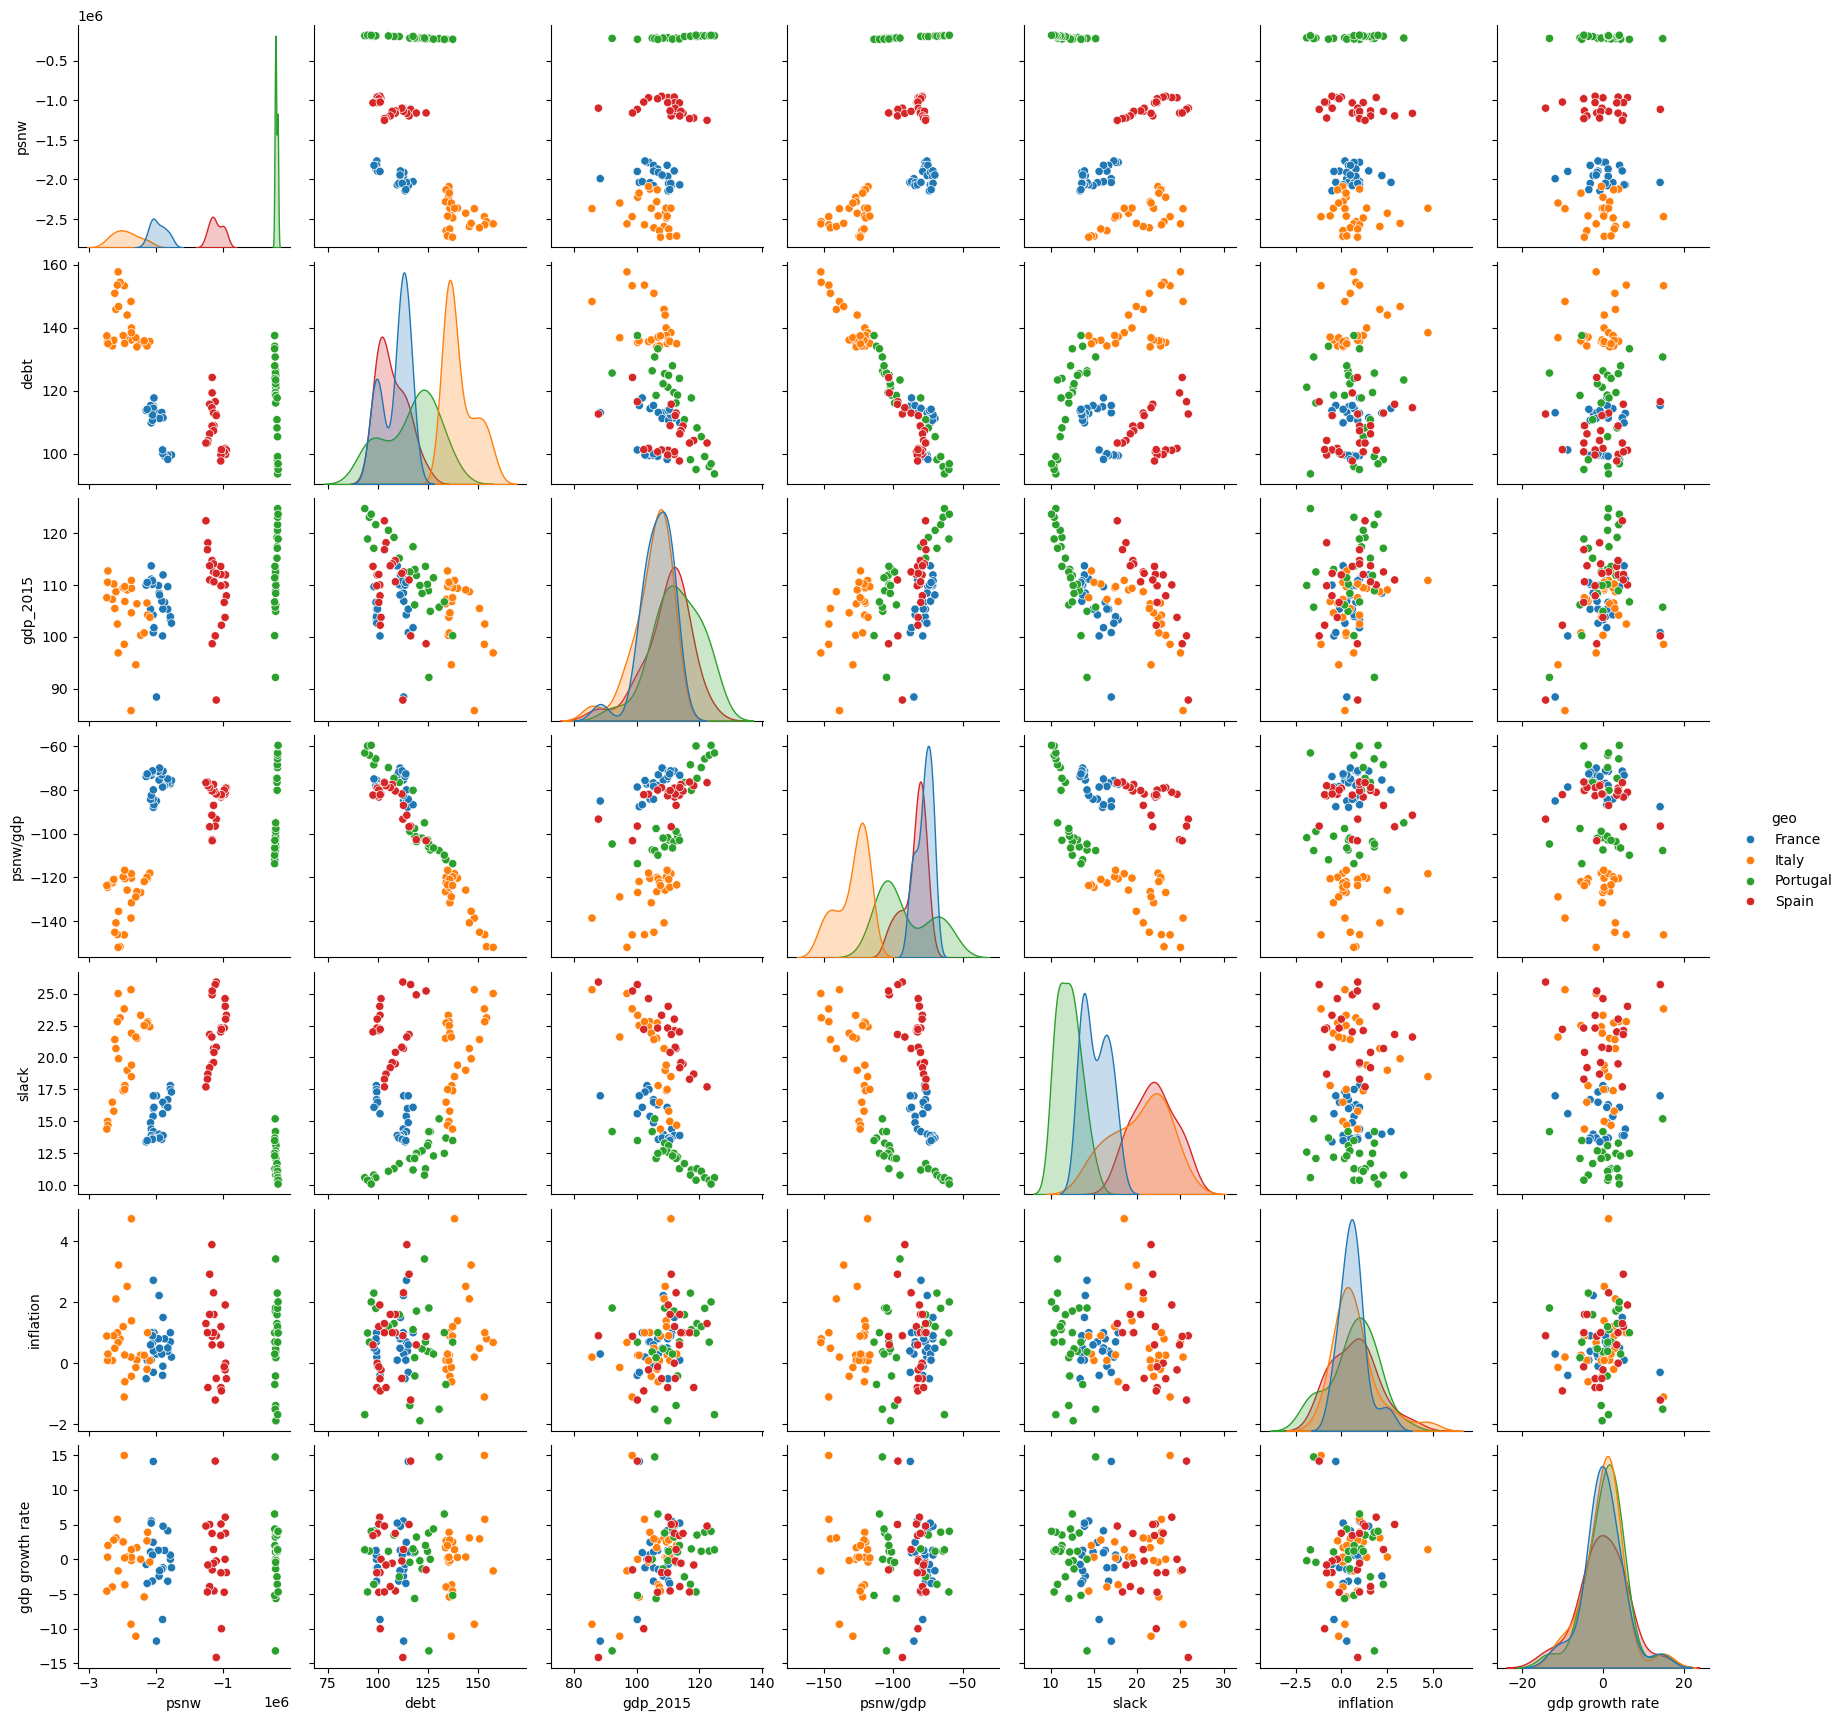

In [67]:
western_europe = df[df['geo'].isin(['France', 'Spain', 'Italy', 'Portugal'])]
sns.pairplot(western_europe, hue='geo') 
plt.show()

Correlation matrix that allows us to see which variables are more closely correlated with eachother for our future analysis

In [68]:
df[['inflation', 'gdp growth rate', 'psnw', 'slack', 'debt', 'psnw/gdp']].corr()

,inflation,gdp growth rate,psnw,slack,debt,psnw/gdp
inflation,1.000000,-0.044709,0.038516,-0.148070,-0.065408,0.010962
gdp growth rate,-0.044709,1.000000,0.029993,-0.028221,-0.018485,-0.018253
psnw,0.038516,0.029993,1.000000,-0.452738,-0.533380,0.687014
slack,-0.148070,-0.028221,-0.452738,1.000000,0.692889,-0.349015
debt,-0.065408,-0.018485,-0.533380,0.692889,1.000000,-0.590260
psnw/gdp,0.010962,-0.018253,0.687014,-0.349015,-0.590260,1.000000


Labor market slack in Germany and Spain

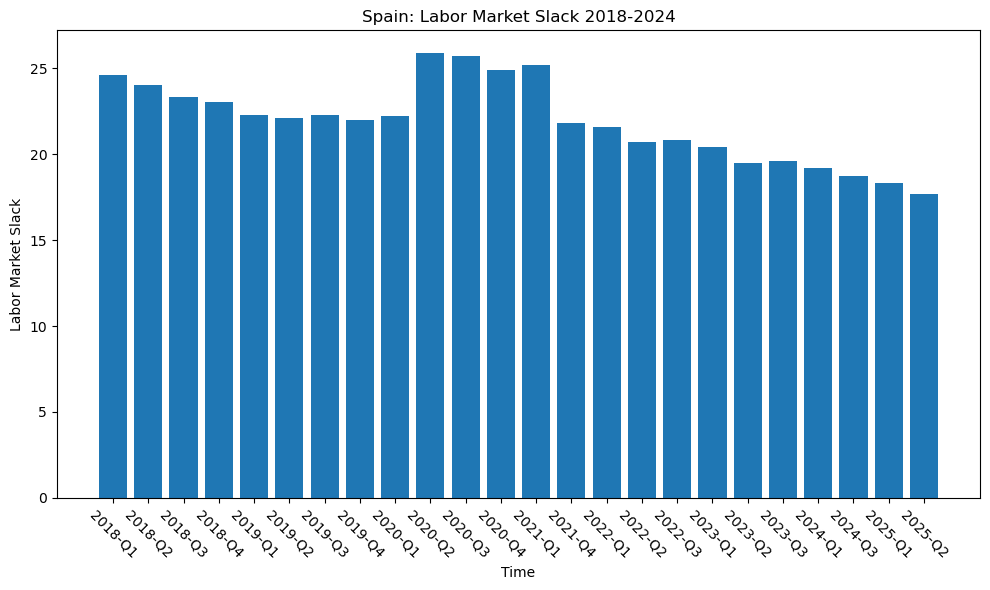

In [69]:
spain = df[df['geo'] == 'Spain']
Germany = df[df['geo'] == 'Germany']

plt.figure(figsize=(10, 6))
plt.bar(spain['TIME_PERIOD'], spain['slack'])
plt.xlabel('Time')
plt.ylabel('Labor Market Slack')
plt.title('Spain: Labor Market Slack 2018-2024')
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

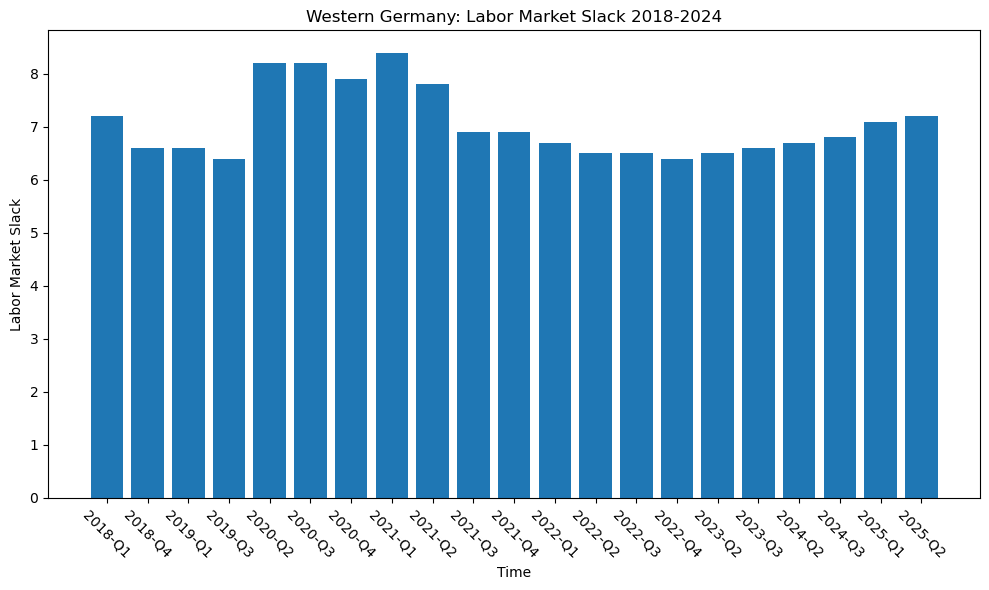

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(Germany['TIME_PERIOD'], Germany['slack'])
plt.xlabel('Time')
plt.ylabel('Labor Market Slack')
plt.title('Western Germany: Labor Market Slack 2018-2024')
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

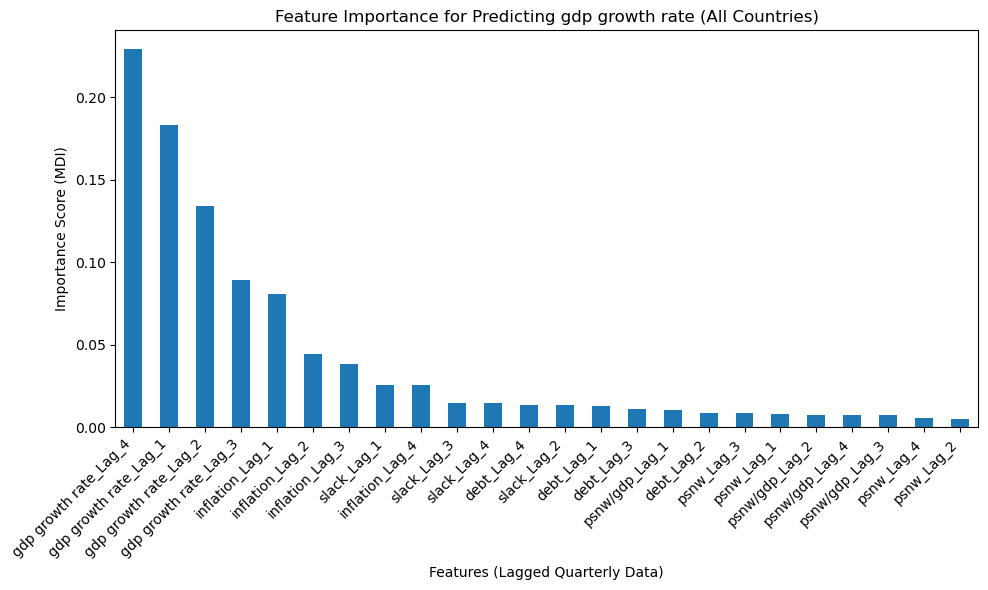

In [71]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()

TARGET_COL = 'gdp growth rate'
PREDICTOR_COLS = ['inflation', 'psnw', 'debt', 'slack', 'psnw/gdp']
ALL_COLS = ['geo', 'TIME_PERIOD', TARGET_COL] + PREDICTOR_COLS

df_ts = df[ALL_COLS].copy()
df_ts.sort_values(by=['geo', 'TIME_PERIOD'], inplace=True)

LAGS = 4  
features = []
for col in PREDICTOR_COLS + [TARGET_COL]:
    for lag in range(1, LAGS + 1):
        lagged_col_name = f'{col}_Lag_{lag}'
        df_ts[lagged_col_name] = df_ts.groupby('geo')[col].shift(lag)
        features.append(lagged_col_name)

df_ts.dropna(inplace=True)

if df_ts.empty:
    print("Error: No data available after merging and creating lags. Check data quality.")
else:
    X = df_ts[features]
    y = df_ts[TARGET_COL] 
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    feature_importances = pd.Series(model.feature_importances_, index=features)
    feature_importances = feature_importances.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feature_importances.plot(kind='bar')
    plt.title(f'Feature Importance for Predicting {TARGET_COL} (All Countries)')
    plt.ylabel('Importance Score (MDI)')
    plt.xlabel('Features (Lagged Quarterly Data)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [72]:
feature_importances = pd.Series(model.feature_importances_, index=features)
df_importance = feature_importances.reset_index()
df_importance.columns = ['Feature', 'Importance Score']
df_importance.sort_values(by='Importance Score', ascending=False, inplace=True)
df_importance['Importance Score (%)'] = (df_importance['Importance Score'] * 100).map('{:.2f}%'.format)
df_importance.drop(columns=['Importance Score'], inplace=True)
print("--- Feature Importance Table ---")
print(df_importance)

--- Feature Importance Table ---
                  Feature Importance Score (%)
23  gdp growth rate_Lag_4               22.89%
20  gdp growth rate_Lag_1               18.32%
21  gdp growth rate_Lag_2               13.43%
22  gdp growth rate_Lag_3                8.92%
0         inflation_Lag_1                8.07%
1         inflation_Lag_2                4.45%
2         inflation_Lag_3                3.80%
12            slack_Lag_1                2.55%
3         inflation_Lag_4                2.55%
14            slack_Lag_3                1.46%
15            slack_Lag_4                1.46%
11             debt_Lag_4                1.36%
13            slack_Lag_2                1.33%
8              debt_Lag_1                1.28%
10             debt_Lag_3                1.12%
16         psnw/gdp_Lag_1                1.06%
9              debt_Lag_2                0.87%
6              psnw_Lag_3                0.86%
4              psnw_Lag_1                0.83%
17         psnw/gdp_Lag_2  

--- K-Means Cluster Assignments (Public Sector Net Worth) ---
Cluster 0: France, Italy
Cluster 1: Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Estonia, Finland, Greece, Hungary, Latvia, Lithuania, Luxembourg, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia
Cluster 2: Germany, Spain
Cluster 3: Norway


C:\Users\damir\AppData\Local\Temp\ipykernel_21988\443664255.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_imputed = pivot_df.fillna(method='ffill')
c:\Users\damir\anaconda3\envs\generalwork\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\damir\AppData\Local\Temp\ipykernel_21988\443664255.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(cluster_labels))


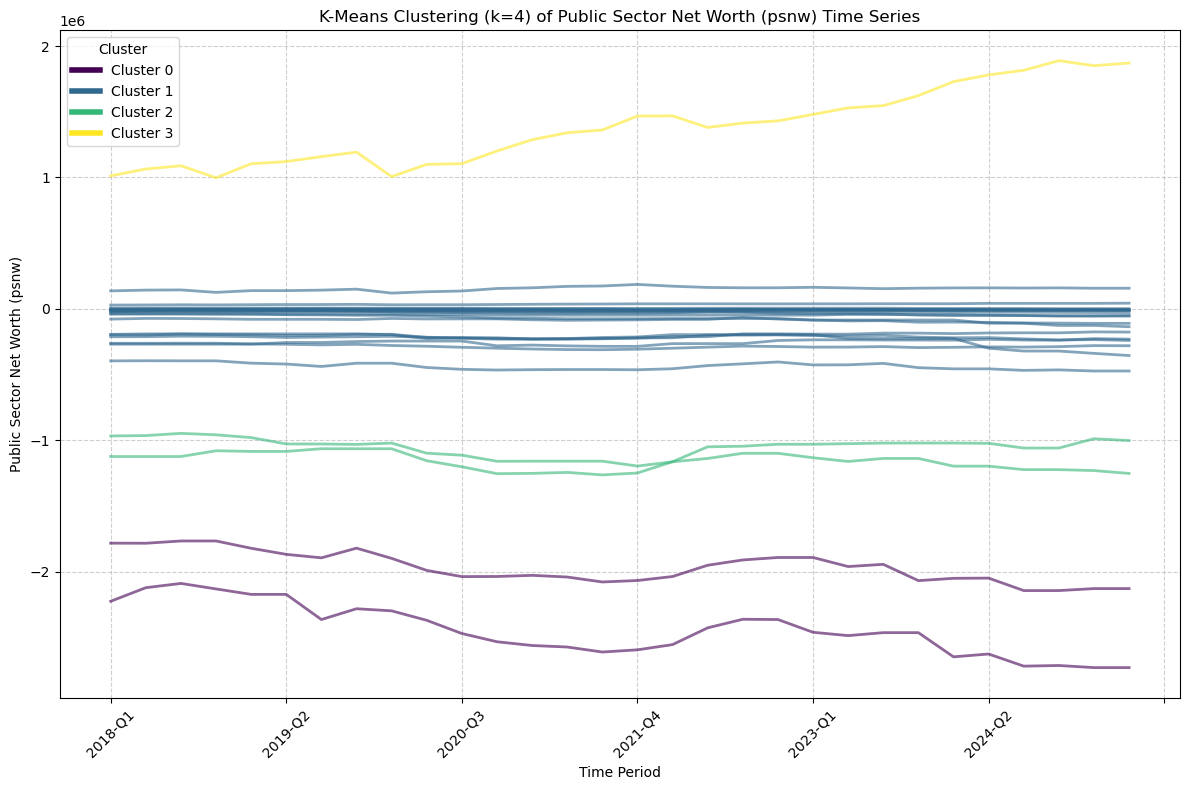

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


pivot_df = df.pivot_table(
    index='TIME_PERIOD', 
    columns='geo', 
    values='psnw'
)
pivot_imputed = pivot_df.fillna(method='ffill')
X = pivot_imputed.T.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
N_CLUSTERS = 4
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
country_clusters = pd.Series(clusters, index=X.index, name='Cluster')
plot_data = pivot_imputed[country_clusters.index].copy()
plt.figure(figsize=(12, 8))

cluster_labels = sorted(country_clusters.unique())
cmap = plt.cm.get_cmap('viridis', len(cluster_labels))
print("--- K-Means Cluster Assignments (Public Sector Net Worth) ---")
for cluster_id in cluster_labels:
    countries_in_cluster = country_clusters[country_clusters == cluster_id].index.tolist()
    print(f"Cluster {cluster_id}: {', '.join(countries_in_cluster)}")
    plot_data[countries_in_cluster].plot(
        legend=False, 
        ax=plt.gca(),
        color=cmap(cluster_id),
        alpha=0.6,
        linewidth=2
    )
legend_handles = []
for cluster_id in cluster_labels:
    legend_handles.append(plt.Line2D(
        [0], [0], 
        color=cmap(cluster_id), 
        lw=4, 
        label=f'Cluster {cluster_id}'
    ))

plt.title('K-Means Clustering (k=4) of Public Sector Net Worth (psnw) Time Series')
plt.xlabel('Time Period')
plt.ylabel('Public Sector Net Worth (psnw)')
plt.legend(handles=legend_handles, title='Cluster', loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Cluster 0: France, Italy
2. Cluster 1: Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Estonia, Finland, Greece, Hungary, Latvia, Lithuania, Luxembourg, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia
3. Cluster 2: Germany, Spain
4. Cluster 3: Norway

# Baseline Model, Simple Linear Regression

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_error

features = ['inflation', 'slack', 'psnw', 'psnw/gdp', 'debt']
target = 'gdp_2015'
df_model = df[[target] + features].copy()
df_model.dropna(inplace=True)
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse = mean_squared_error(y_test, y_pred)
n = len(y_test)
sse = mse * n
mae_base = mean_absolute_error(y_test, y_pred)
# Print all results
print(f"Shape of initial data: {df.shape}")
print(f"Shape of data after dropping NaNs: {df_model.shape}")
print("\n--- Model Training Summary ---")
print(f"Features (X): {features}")
print(f"Target (y): {target}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Model used: Linear Regression")
print(f"R-squared score on the test set: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse:.4f}")
print(f"Number of test samples (n): {n}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Sum of Squared Errors (SSE): {sse:.4f}")
print(f"Linear Regression MAE: {mae_base:.4f}")

Shape of initial data: (636, 9)
Shape of data after dropping NaNs: (590, 6)

--- Model Training Summary ---
Features (X): ['inflation', 'slack', 'psnw', 'psnw/gdp', 'debt']
Target (y): gdp_2015
Training set size: 472
Testing set size: 118
Model used: Linear Regression
R-squared score on the test set: 0.2500
Root Mean Squared Error (RMSE) on the test set: 13.1469
Number of test samples (n): 118
Mean Squared Error (MSE): 172.8399
Sum of Squared Errors (SSE): 20395.1120
Linear Regression MAE: 9.5650


In [75]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test:{y_test.shape}')

X_train: (472, 5)
y_train: (472,)
X_test: (118, 5)
y_test:(118,)


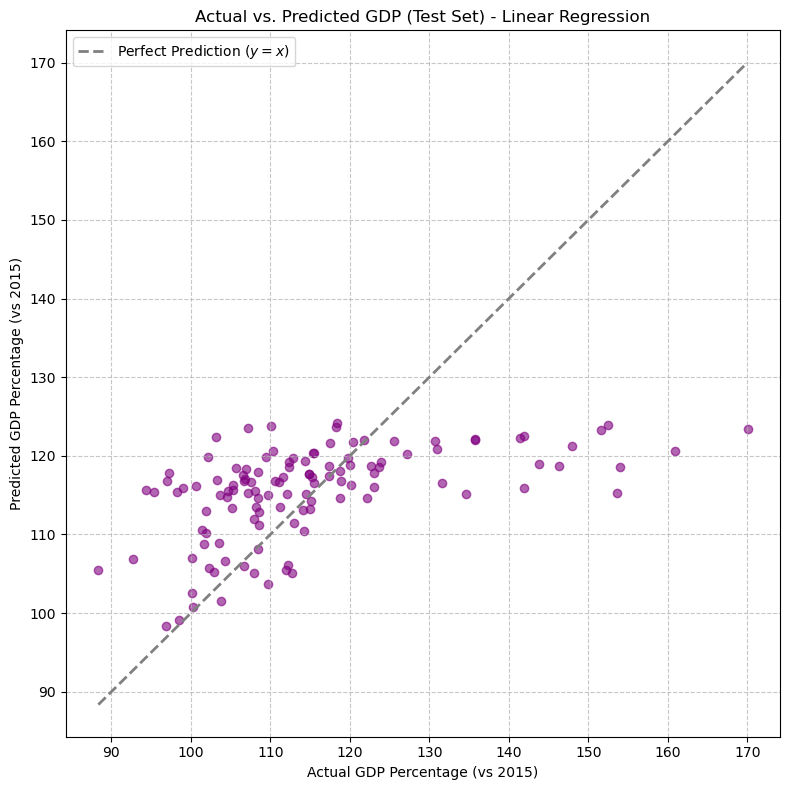

In [76]:
plot_df_lr = pd.DataFrame({
    'Actual GDP': y_test,
    'Predicted GDP': y_pred
})

# Determine plot limits for the perfect prediction line (y=x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(plot_df_lr['Actual GDP'], plot_df_lr['Predicted GDP'], alpha=0.6, color='purple')

# Add the perfect prediction line (y=x)
plt.plot([min_val, max_val], [min_val, max_val], 
         '--', 
         color='grey', 
         linewidth=2, 
         label='Perfect Prediction ($y=x$)')

plt.title('Actual vs. Predicted GDP (Test Set) - Linear Regression')
plt.xlabel('Actual GDP Percentage (vs 2015)')
plt.ylabel('Predicted GDP Percentage (vs 2015)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Tuned Hyperparameter Models: GridSearchCV. Features t-1

tuned

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
required_cols = ['geo', 'TIME_PERIOD', 'psnw', 'inflation', 'slack', 'psnw/gdp', 'debt', 'gdp_2015']
df_model = df[required_cols].copy()
df_model['date'] = (df_model['TIME_PERIOD'].str.replace('Q1', '-03-31')
                                          .str.replace('Q2', '-06-30')
                                          .str.replace('Q3', '-09-30')
                                          .str.replace('Q4', '-12-31'))
df_model['date'] = pd.to_datetime(df_model['date'])
df_model.dropna(subset=required_cols, inplace=True)
lag_features = ['psnw', 'inflation', 'slack', 'psnw/gdp', 'debt']
target_col = 'gdp_2015'
df_model.sort_values(by=['geo', 'date'], inplace=True)

def create_lags(group, features, n_lag=1):
    for feature in features:
        group[f'{feature}_t_minus_{n_lag}'] = group[feature].shift(n_lag)
    group[f'{target_col}_t'] = group[target_col]
    return group

df_lagged = df_model.groupby('geo', group_keys=False).apply(create_lags, lag_features, 1)
final_feature_names = [f'{f}_t_minus_1' for f in lag_features]
df_lagged.dropna(subset=final_feature_names + [f'{target_col}_t'], inplace=True)


X = df_lagged[final_feature_names].copy()
y = df_lagged[f'{target_col}_t']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

print("Starting GridSearchCV for hyperparameter tuning (Minimizing RMSE)...")
grid_search_rmse = GridSearchCV(estimator=rf, 
                                param_grid=param_grid, 
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                verbose=1,
                                n_jobs=-1)

grid_search_rmse.fit(X_train, y_train)
best_params_rmse = grid_search_rmse.best_params_
best_mse_cv = -grid_search_rmse.best_score_
best_rmse_cv = np.sqrt(best_mse_cv)
best_model_rmse = grid_search_rmse.best_estimator_
y_pred_tuned_rmse = best_model_rmse.predict(X_test)
mse_test_tuned_rmse = mean_squared_error(y_test, y_pred_tuned_rmse)
rmse_test_tuned_rmse = np.sqrt(mse_test_tuned_rmse)
r2_test_tuned_rmse = r2_score(y_test, y_pred_tuned_rmse)
mae = mean_absolute_error(y_test, y_pred_tuned_rmse)

print("\n--- Final GridSearchCV Results (Optimized for RMSE) ---")
print(f"Best Parameters: {best_params_rmse}")
print(f"Best Cross-Validation RMSE: {best_rmse_cv:.4f}")
print(f"Test Set RMSE (Final Tuned Model): {rmse_test_tuned_rmse:.4f}")
print(f"Test Set R2 Score (Final Tuned Model): {r2_test_tuned_rmse:.4f}")
print(f"Tes Set MAE (Final Tuned Mode): {mae:.4f}")

C:\Users\damir\AppData\Local\Temp\ipykernel_21988\3254426080.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_lagged = df_model.groupby('geo', group_keys=False).apply(create_lags, lag_features, 1)


Starting GridSearchCV for hyperparameter tuning (Minimizing RMSE)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Final GridSearchCV Results (Optimized for RMSE) ---
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation RMSE: 9.4614
Test Set RMSE (Final Tuned Model): 9.0852
Test Set R2 Score (Final Tuned Model): 0.6337
Tes Set MAE (Final Tuned Mode): 6.9360


In [78]:
feature_importances = pd.Series(best_model_rmse.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("\n--- Feature Importances for T-1 Model (Tuned) ---")
print(feature_importances.round(4))


--- Feature Importances for T-1 Model (Tuned) ---
psnw_t_minus_1         0.3352
psnw/gdp_t_minus_1     0.2941
slack_t_minus_1        0.1465
debt_t_minus_1         0.1197
inflation_t_minus_1    0.1045
dtype: float64


Permutation Importance


Permutation Importance Scores (Increase in MSE after shuffling):
            Feature  Importance Mean  Importance Std Dev
     psnw_t_minus_1       210.734136           16.426750
 psnw/gdp_t_minus_1        98.672534           10.416249
     debt_t_minus_1        35.238431            5.944416
inflation_t_minus_1        29.848018            2.592393
    slack_t_minus_1         9.646675            2.651508


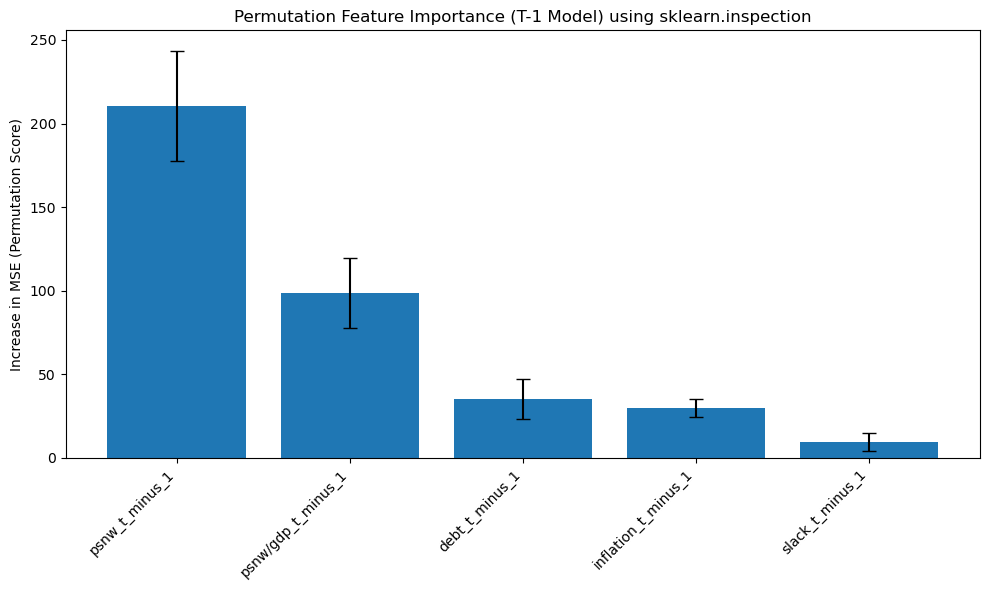

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    estimator=best_model_rmse, 
    X=X_test, 
    y=y_test, 
    scoring='neg_mean_squared_error', 
    n_repeats=5, 
    random_state=42,
    n_jobs=-1
)

feature_importances_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std Dev': result.importances_std
})

feature_importances_df = feature_importances_df.sort_values(by='Importance Mean', ascending=False)
print("\nPermutation Importance Scores (Increase in MSE after shuffling):")
print(feature_importances_df.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance Mean'], 
        yerr=feature_importances_df['Importance Std Dev'] * 2, capsize=5)
plt.title('Permutation Feature Importance (T-1 Model) using sklearn.inspection')
plt.ylabel('Increase in MSE (Permutation Score)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

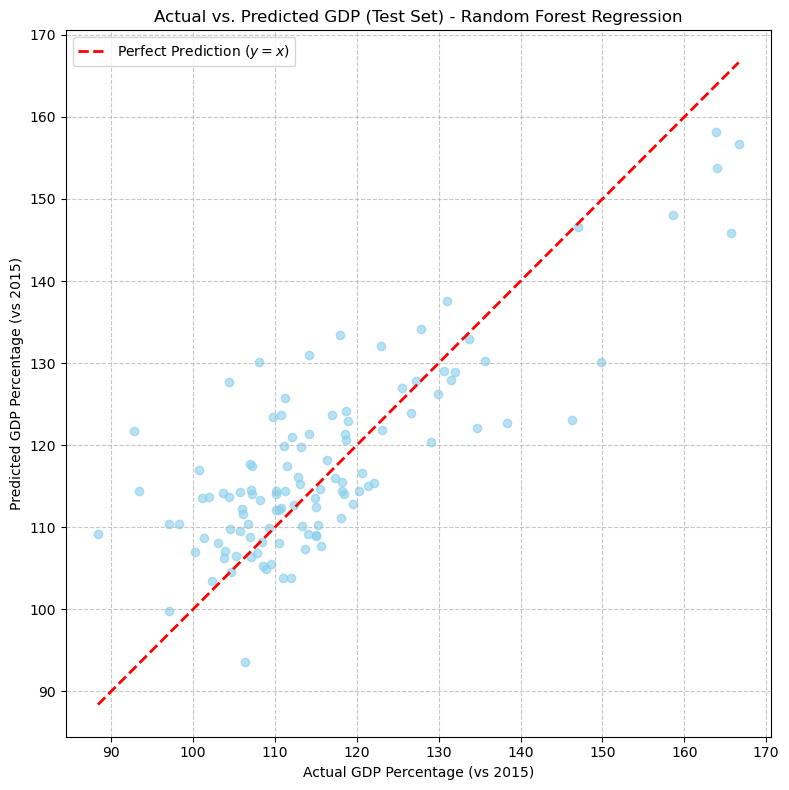

In [ ]:
plot_df = pd.DataFrame({
    'Actual GDP': y_test,
    'Predicted GDP': y_pred_tuned_rmse
})

min_val = min(y_test.min(), y_pred_tuned_rmse.min())
max_val = max(y_test.max(), y_pred_tuned_rmse.max())
plt.figure(figsize=(8, 8))
plt.scatter(plot_df['Actual GDP'], plot_df['Predicted GDP'], alpha=0.6, color='skyblue')

plt.plot([min_val, max_val], [min_val, max_val], 
         '--', 
         color='red', 
         linewidth=2, 
         label='Perfect Prediction ($y=x$)')

plt.title('Actual vs. Predicted GDP (Test Set) - Random Forest Regression')
plt.xlabel('Actual GDP Percentage (vs 2015)')
plt.ylabel('Predicted GDP Percentage (vs 2015)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

In [81]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test:{y_test.shape}')

X_train: (449, 5)
y_train: (449,)
X_test: (113, 5)
y_test:(113,)


In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

print("## 1. Overall Model P-value (Permutation Test)")
r2_test = r2_score(y_test, y_pred_tuned_rmse)
observed_r2 = r2_test
n_permutations = 500  
null_r2_scores = []

for i in range(n_permutations):
    y_test_shuffled = y_test.sample(frac=1, replace=False, random_state=i).values 
    y_pred_null = best_model_rmse.predict(X_test)
    r2_null = r2_score(y_test_shuffled, y_pred_null)
    null_r2_scores.append(r2_null)

p_value_overall = (np.array(null_r2_scores) >= observed_r2).sum() / n_permutations

print(f"Observed R-squared: {observed_r2:.4f}")
print(f"Overall P-value: {p_value_overall:.4f}")

if p_value_overall < 0.05:
    print("Conclusion: The model's performance is statistically **significant** (p < 0.05).")
else:
    print("Conclusion: The model's performance is **not statistically significant** (p >= 0.05).")

print("-" * 50)

print("## 2. Individual Feature P-values (Permutation Importance Test)")


N_REPEATS = 50 

r = permutation_importance(
    best_model_rmse, X_test, y_test, 
    n_repeats=N_REPEATS, 
    random_state=42, 
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

feature_results = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance_Mean': r.importances_mean,
    'Importance_Std': r.importances_std,
})
feature_results.sort_values(by='Importance_Mean', ascending=False, inplace=True)
feature_results.sort_values(by='Importance_Mean', ascending=False, inplace=True)

feature_results['Z_Score_Proxy'] = feature_results['Importance_Mean'] / (feature_results['Importance_Std'] / np.sqrt(N_REPEATS))
print(feature_results.round(4))

## 1. Overall Model P-value (Permutation Test)
Observed R-squared: 0.6337
Overall P-value: 0.0000
Conclusion: The model's performance is statistically **significant** (p < 0.05).
--------------------------------------------------
## 2. Individual Feature P-values (Permutation Importance Test)
               Feature  Importance_Mean  Importance_Std  Z_Score_Proxy
0       psnw_t_minus_1         203.2449         27.4053        52.4409
3   psnw/gdp_t_minus_1         101.5901         13.2749        54.1134
4       debt_t_minus_1          27.6825          8.5762        22.8241
1  inflation_t_minus_1          22.4191          7.2163        21.9678
2      slack_t_minus_1          10.1161          3.8699        18.4843


In [83]:
print(X_test.columns.tolist())

['psnw_t_minus_1', 'inflation_t_minus_1', 'slack_t_minus_1', 'psnw/gdp_t_minus_1', 'debt_t_minus_1']



--- Starting SHAP Value Calculation ---

--- SHAP Summary Plot: Feature Influence on Prediction ---


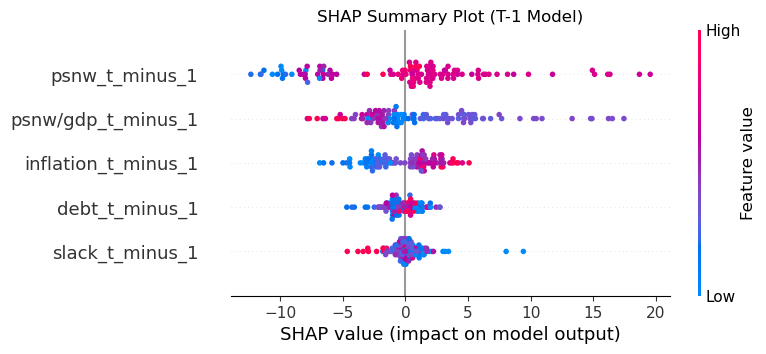


--- SHAP Dependence Plot: Relationship of PSNW and GDP ---


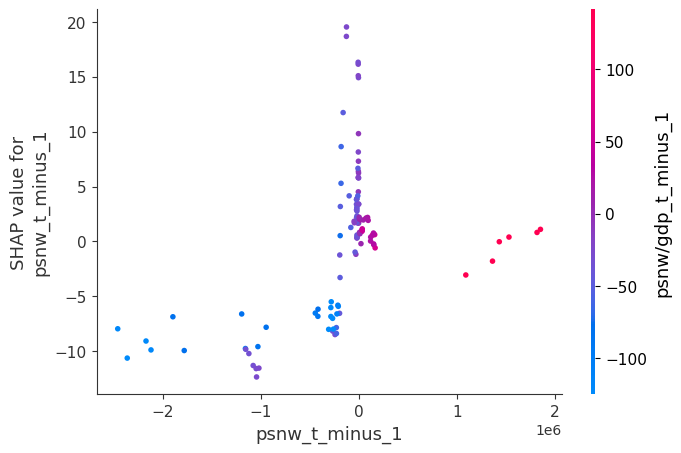

In [ ]:
import shap 
import xgboost
print("\n--- Starting SHAP Value Calculation ---")
explainer = shap.TreeExplainer(best_model_rmse)
shap_values = explainer.shap_values(X_test)

print("\n--- SHAP Summary Plot: Feature Influence on Prediction ---")
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)
plt.title("SHAP Summary Plot (T-1 Model)")
plt.savefig('t1_shap_summary_plot.png')
plt.show()


print("\n--- SHAP Dependence Plot: Relationship of PSNW and GDP ---")

psnw_index = X_test.columns.get_loc('psnw_t_minus_1')

shap.dependence_plot(
    ind=psnw_index,  
    shap_values=shap_values, 
    features=X_test, 
    feature_names=X_test.columns.tolist(),
    interaction_index='psnw/gdp_t_minus_1',
    show=False
)

# Tuned Hyperparameter Models: GridSearchCV. Features t-2

In [ ]:
def create_lags_t2(group, features, n_lag=2):
    """Creates T-2 lagged features and the current target (T) for a time series group."""
    for feature in features:
        group[f'{feature}_t_minus_{n_lag}'] = group[feature].shift(n_lag)
    group[f'{target_col}_t'] = group[target_col]
    return group

df_lagged_t2 = df_model.groupby('geo', group_keys=False).apply(create_lags_t2, lag_features, 2)

final_feature_names_t2 = [f'{f}_t_minus_2' for f in lag_features]
df_lagged_t2.dropna(subset=final_feature_names_t2 + [f'{target_col}_t'], inplace=True)

X_t2 = df_lagged_t2[final_feature_names_t2].copy()
y_t2 = df_lagged_t2[f'{target_col}_t']
X_train, X_test, y_train, y_test = train_test_split(X_t2, y_t2, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

print("Starting GridSearchCV for T-2 lagged features (Minimizing RMSE)...")
grid_search_t2 = GridSearchCV(estimator=rf, 
                              param_grid=param_grid, 
                              cv=5, 
                              scoring='neg_mean_squared_error', 
                              verbose=1,
                              n_jobs=-1)

grid_search_t2.fit(X_train, y_train)

best_params_t2 = grid_search_t2.best_params_
best_mse_cv_t2 = -grid_search_t2.best_score_
best_rmse_cv_t2 = np.sqrt(best_mse_cv_t2)
best_model_t2 = grid_search_t2.best_estimator_

y_pred_tuned_t2 = best_model_t2.predict(X_test)
mse_test_tuned_t2 = mean_squared_error(y_test, y_pred_tuned_t2)
rmse_test_tuned_t2 = np.sqrt(mse_test_tuned_t2)
r2_test_tuned_t2 = r2_score(y_test, y_pred_tuned_t2)
mae_t2 = mean_absolute_error(y_test, y_pred_tuned_t2)

print("\n--- Final GridSearchCV Results for T-2 Lagged Features (Optimized for RMSE) ---")
print(f"Best Parameters: {best_params_t2}")
print(f"Best Cross-Validation RMSE: {best_rmse_cv_t2:.4f}")
print(f"Test Set RMSE (Final Tuned Model): {rmse_test_tuned_t2:.4f}")
print(f"Test Set R2 Score (Final Tuned Model): {r2_test_tuned_t2:.4f}")
print(f"Test Set MAE (Final Tuned Mode): {mae_t2:.4f}")


C:\Users\damir\AppData\Local\Temp\ipykernel_21988\1696750692.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_lagged_t2 = df_model.groupby('geo', group_keys=False).apply(create_lags_t2, lag_features, 2)


Starting GridSearchCV for T-2 lagged features (Minimizing RMSE)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Final GridSearchCV Results for T-2 Lagged Features (Optimized for RMSE) ---
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation RMSE: 9.4953
Test Set RMSE (Final Tuned Model): 10.4057
Test Set R2 Score (Final Tuned Model): 0.5044
Test Set MAE (Final Tuned Mode): 7.4555


In [86]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test:{y_test.shape}')

X_train: (427, 5)
y_train: (427,)
X_test: (107, 5)
y_test:(107,)


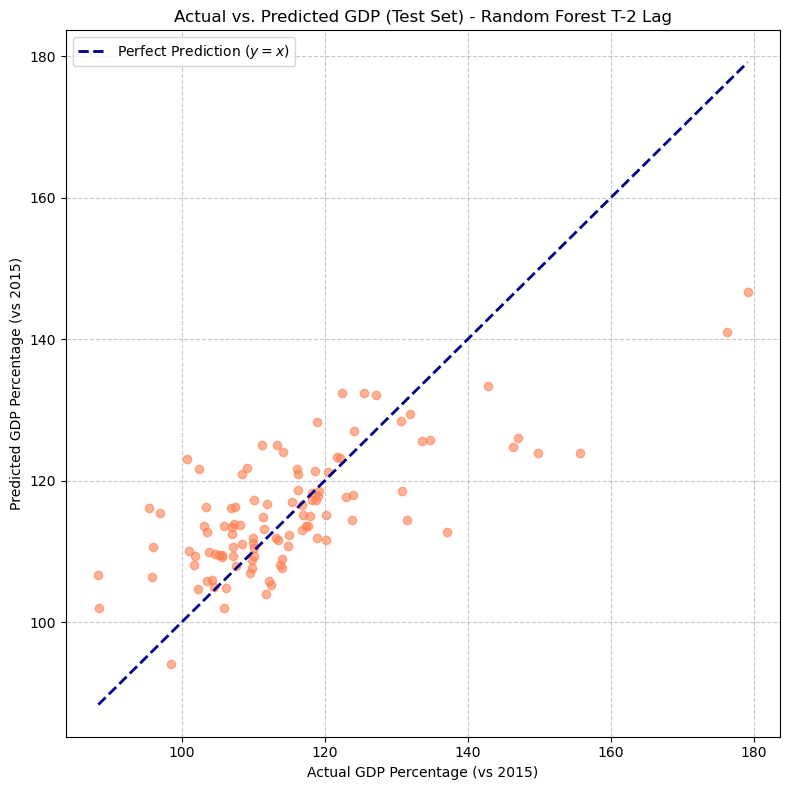

In [ ]:
best_model_t2 = grid_search_t2.best_estimator_
y_pred_tuned_t2 = best_model_t2.predict(X_test)

plot_df_t2 = pd.DataFrame({
    'Actual GDP': y_test,
    'Predicted GDP': y_pred_tuned_t2
})

min_val = min(y_test.min(), y_pred_tuned_t2.min())
max_val = max(y_test.max(), y_pred_tuned_t2.max())

plt.figure(figsize=(8, 8))
plt.scatter(plot_df_t2['Actual GDP'], plot_df_t2['Predicted GDP'], alpha=0.6, color='coral')
plt.plot([min_val, max_val], [min_val, max_val], 
         '--', 
         color='darkblue', 
         linewidth=2, 
         label='Perfect Prediction ($y=x$)')

plt.title('Actual vs. Predicted GDP (Test Set) - Random Forest T-2 Lag')
plt.xlabel('Actual GDP Percentage (vs 2015)')
plt.ylabel('Predicted GDP Percentage (vs 2015)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Tuned Hyperparameter Models: GridSearchCV. Features t-4

t-4

In [ ]:
lag_features = ['psnw', 'inflation', 'slack', 'psnw/gdp', 'debt']
target_col = 'gdp_2015'
df_model.sort_values(by=['geo', 'date'], inplace=True)

def create_lags_t4(group, features, n_lag=4):
    """Creates T-4 lagged features and the current target (T) for a time series group."""
    for feature in features:
        group[f'{feature}_t_minus_{n_lag}'] = group[feature].shift(n_lag)
    group[f'{target_col}_t'] = group[target_col]
    return group

df_lagged_t4 = df_model.groupby('geo', group_keys=False).apply(create_lags_t4, lag_features, 4)

final_feature_names_t4 = [f'{f}_t_minus_4' for f in lag_features]
df_lagged_t4.dropna(subset=final_feature_names_t4 + [f'{target_col}_t'], inplace=True)

X_t4 = df_lagged_t4[final_feature_names_t4].copy()
y_t4 = df_lagged_t4[f'{target_col}_t']
X_train, X_test, y_train, y_test = train_test_split(X_t4, y_t4, test_size=0.2, random_state=42)

# --- 4. Define Hyperparameter Grid ---
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

print("Starting GridSearchCV for T-4 lagged features (Minimizing RMSE)...")
grid_search_t4 = GridSearchCV(estimator=rf, 
                              param_grid=param_grid, 
                              cv=5, 
                              scoring='neg_mean_squared_error', 
                              verbose=1,
                              n_jobs=-1)

grid_search_t4.fit(X_train, y_train)

best_params_t4 = grid_search_t4.best_params_
best_mse_cv_t4 = -grid_search_t4.best_score_
best_rmse_cv_t4 = np.sqrt(best_mse_cv_t4)
best_model_t4 = grid_search_t4.best_estimator_

y_pred_tuned_t4 = best_model_t4.predict(X_test)
mse_test_tuned_t4 = mean_squared_error(y_test, y_pred_tuned_t4)
rmse_test_tuned_t4 = np.sqrt(mse_test_tuned_t4)
r2_test_tuned_t4 = r2_score(y_test, y_pred_tuned_t4)
mae_t4 = mean_absolute_error(y_test, y_pred_tuned_t4)

print("\n--- Final GridSearchCV Results for T-4 Lagged Features (Optimized for RMSE) ---")
print(f"Best Parameters: {best_params_t4}")
print(f"Best Cross-Validation RMSE: {best_rmse_cv_t4:.4f}")
print(f"Test Set RMSE (Final Tuned Model): {rmse_test_tuned_t4:.4f}")
print(f"Test Set R2 Score (Final Tuned Model): {r2_test_tuned_t4:.4f}")
print(f"Test Set MAE (Final Tuned Model: {mae_t4:.4f}")

C:\Users\damir\AppData\Local\Temp\ipykernel_21988\3738244034.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_lagged_t4 = df_model.groupby('geo', group_keys=False).apply(create_lags_t4, lag_features, 4)


Starting GridSearchCV for T-4 lagged features (Minimizing RMSE)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Final GridSearchCV Results for T-4 Lagged Features (Optimized for RMSE) ---
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation RMSE: 10.0414
Test Set RMSE (Final Tuned Model): 9.4231
Test Set R2 Score (Final Tuned Model): 0.5308
Test Set MAE (Final Tuned Model: 7.2450


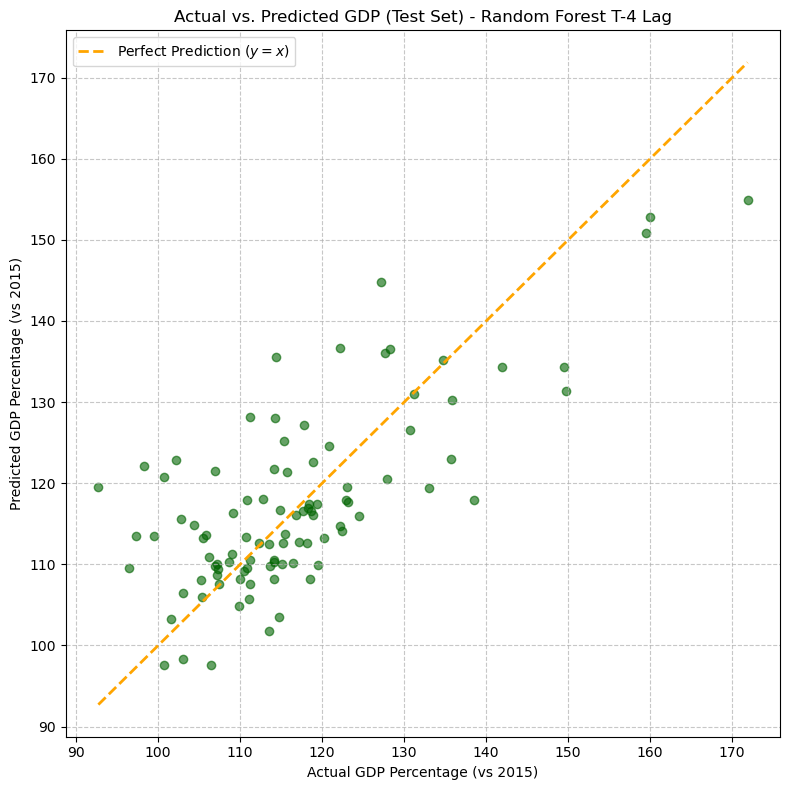

In [ ]:
plot_df_t4 = pd.DataFrame({
    'Actual GDP': y_test,
    'Predicted GDP': y_pred_tuned_t4
})

min_val = min(y_test.min(), y_pred_tuned_t4.min())
max_val = max(y_test.max(), y_pred_tuned_t4.max())
plt.figure(figsize=(8, 8))
plt.scatter(plot_df_t4['Actual GDP'], plot_df_t4['Predicted GDP'], alpha=0.6, color='darkgreen')
plt.plot([min_val, max_val], [min_val, max_val], 
         '--', 
         color='orange', 
         linewidth=2, 
         label='Perfect Prediction ($y=x$)')

plt.title('Actual vs. Predicted GDP (Test Set) - Random Forest T-4 Lag')
plt.xlabel('Actual GDP Percentage (vs 2015)')
plt.ylabel('Predicted GDP Percentage (vs 2015)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Results

In [ ]:

results = {'T-1 Lag': {'R2': 0.6337, 'RMSE': 9.0852, 'MAE': 6.9360},
    'T-2 Lag': {'R2': 0.5044, 'RMSE': 10.4057, 'MAE': 7.4555},
    'T-4 Lag': {'R2': 0.5308, 'RMSE': 9.4231, 'MAE':7.2450 },
    'Baseline Model': {'R2':0.25000, 'RMSE': 13.1469, 'MAE':9.5650}
}
df_summary = pd.DataFrame(results).T
df_summary.index.name = "Model"
print("--- Final Model Comparison (Test Set) ---")
print(df_summary.to_markdown(floatfmt=".4f"))

--- Final Model Comparison (Test Set) ---
| Model          |     R2 |    RMSE |    MAE |
|:---------------|-------:|--------:|-------:|
| T-1 Lag        | 0.6337 |  9.0852 | 6.9360 |
| T-2 Lag        | 0.5044 | 10.4057 | 7.4555 |
| T-4 Lag        | 0.5308 |  9.4231 | 7.2450 |
| Baseline Model | 0.2500 | 13.1469 | 9.5650 |
